In [48]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [49]:
df = pd.read_csv("News_Tweets.csv", index_col=False)

In [50]:
df

,Tweets
0,The Assam Healing (Prevention of Evil) Practic...
1,Mumbai police have registered a case after #Bo...
2,Congress MP #RahulGandhi on February 21 accuse...
3,The annual pilgrimage from #Rameswaram to the ...
4,"Actor #TriptiiDimri, best known for #Animal an..."
...,...
95,At least three Indians were forced to fight al...
96,India and Sri Lanka are set to take ongoing di...
97,Farmer unions and Khap leaders at a mahapancha...
98,Union Home Minister Amit Shah on Tuesday hit o...


In [51]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [52]:
new_df = pd.DataFrame()
new_df["Tweets"] = df["Tweets"].apply(data_processing)


In [53]:
new_df

,Tweets
0,assam healing prevention evil practices bill 2...
1,mumbai police registered case bollywood actor ...
2,congress mp rahulgandhi february 21 accused bj...
3,annual pilgrimage rameswaram srilankan islet k...
4,actor triptiidimri best known animal qala boar...
...,...
95,least three indians forced fight alongside rus...
96,india sri lanka set take ongoing discussions e...
97,farmer unions khap leaders mahapanchayat harya...
98,union home minister amit shah tuesday hit oppo...


In [54]:
new_df = new_df.drop_duplicates("Tweets")

In [55]:
new_df

,Tweets
0,assam healing prevention evil practices bill 2...
1,mumbai police registered case bollywood actor ...
2,congress mp rahulgandhi february 21 accused bj...
3,annual pilgrimage rameswaram srilankan islet k...
4,actor triptiidimri best known animal qala boar...
...,...
95,least three indians forced fight alongside rus...
96,india sri lanka set take ongoing discussions e...
97,farmer unions khap leaders mahapanchayat harya...
98,union home minister amit shah tuesday hit oppo...


In [56]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [57]:
new_df["Tweets"] = new_df["Tweets"].apply(lambda x: stemming(x))

In [58]:
new_df

,Tweets
0,assam healing prevention evil practices bill 2...
1,mumbai police registered case bollywood actor ...
2,congress mp rahulgandhi february 21 accused bj...
3,annual pilgrimage rameswaram srilankan islet k...
4,actor triptiidimri best known animal qala boar...
...,...
95,least three indians forced fight alongside rus...
96,india sri lanka set take ongoing discussions e...
97,farmer unions khap leaders mahapanchayat harya...
98,union home minister amit shah tuesday hit oppo...


In [59]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  100 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB


In [60]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [61]:
new_df["Polarity"] = new_df["Tweets"].apply(polarity)

In [62]:
new_df

,Tweets,Polarity
0,assam healing prevention evil practices bill 2...,-1.000000
1,mumbai police registered case bollywood actor ...,-0.400000
2,congress mp rahulgandhi february 21 accused bj...,0.000000
3,annual pilgrimage rameswaram srilankan islet k...,0.000000
4,actor triptiidimri best known animal qala boar...,1.000000
...,...,...
95,least three indians forced fight alongside rus...,-0.233333
96,india sri lanka set take ongoing discussions e...,0.066667
97,farmer unions khap leaders mahapanchayat harya...,0.000000
98,union home minister amit shah tuesday hit oppo...,0.000000


In [63]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [64]:
new_df["Sentiment"] = new_df["Polarity"].apply(sentiment)

In [65]:
new_df

,Tweets,Polarity,Sentiment
0,assam healing prevention evil practices bill 2...,-1.000000,Negative
1,mumbai police registered case bollywood actor ...,-0.400000,Negative
2,congress mp rahulgandhi february 21 accused bj...,0.000000,Neutral
3,annual pilgrimage rameswaram srilankan islet k...,0.000000,Neutral
4,actor triptiidimri best known animal qala boar...,1.000000,Positive
...,...,...,...
95,least three indians forced fight alongside rus...,-0.233333,Negative
96,india sri lanka set take ongoing discussions e...,0.066667,Positive
97,farmer unions khap leaders mahapanchayat harya...,0.000000,Neutral
98,union home minister amit shah tuesday hit oppo...,0.000000,Neutral


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

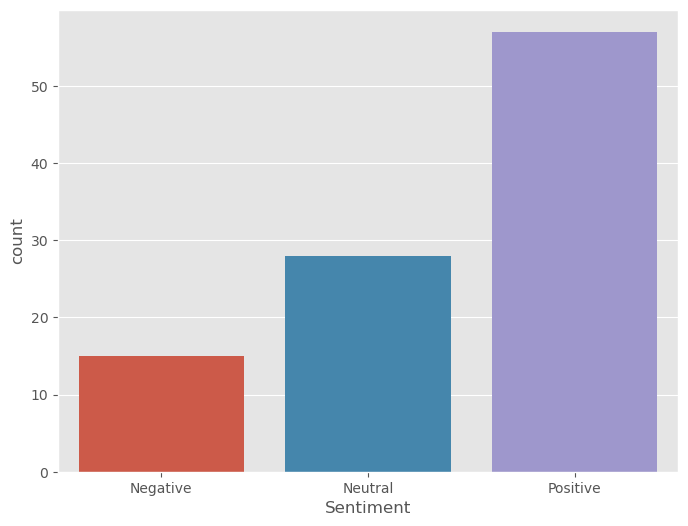

In [66]:
fig = plt.figure(figsize=(8,6))
sns.countplot(x='Sentiment', data = new_df)

Text(0.5, 1.0, 'Distribution of sentiments')

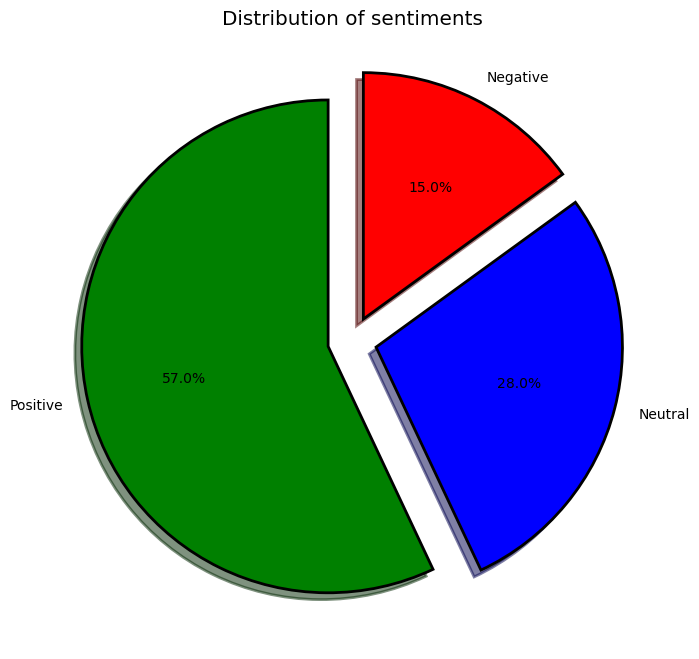

In [67]:
fig = plt.figure(figsize=(8,8))
colors = ("green", "blue", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = new_df['Sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [71]:
new_df['Sentiment'].unique()

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [70]:
pos_tweets = new_df[new_df['Sentiment'] == 'Positive']
pos_tweets = pos_tweets.sort_values(['Polarity'], ascending= False)
pos_tweets.head()

,Tweets,Polarity,Sentiment
4,actor triptiidimri best known animal qala boar...,1.000000,Positive
54,shahrukhkhan best actor award jawan dadasaheb ...,0.666667,Positive
26,greatly appreciate support resolve friends sup...,0.616667,Positive
83,farmers rejected government proposal minimum s...,0.600000,Positive
17,bombayhc february 21 issued notice maharashtra...,0.500000,Positive


In [73]:
nut_tweets = new_df[new_df['Sentiment'] == 'Neutral']
nut_tweets = nut_tweets.sort_values(['Polarity'], ascending= False)
nut_tweets.head()

,Tweets,Polarity,Sentiment
2,congress mp rahulgandhi february 21 accused bj...,0.0,Neutral
3,annual pilgrimage rameswaram srilankan islet k...,0.0,Neutral
98,union home minister amit shah tuesday hit oppo...,0.0,Neutral
97,farmer unions khap leaders mahapanchayat harya...,0.0,Neutral
94,day ahead delhi chalo march punjab police leav...,0.0,Neutral


In [74]:
neg_tweets = new_df[new_df['Sentiment'] == 'Negative']
neg_tweets = neg_tweets.sort_values(['Polarity'], ascending= False)
neg_tweets.head()

,Tweets,Polarity,Sentiment
24,india china agreed maintain peace tranquillity...,-5.551115e-18,Negative
6,new study team reported finally discovering mi...,-1.590909e-02,Negative
91,aap congress welcomed scs decision chandigarh ...,-2.500000e-02,Negative
84,amid standoff farmers taking part delhi chalo ...,-5.000000e-02,Negative
92,cbi searched premises ramesh abhishek secretar...,-5.000000e-02,Negative


In [75]:
vect = CountVectorizer(ngram_range=(1,2)).fit(new_df["Tweets"])